<a href="https://colab.research.google.com/github/MikhailIurkus/yandex_practicum_project/blob/main/Iurkus_Mikhail_project_2_Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Описание проекта

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Описание данных

* children — количество детей в семье
* days_employed — общий трудовой стаж в днях
* dob_years — возраст клиента в годах
* education — уровень образования клиента
* education_id — идентификатор уровня образования
* family_status — семейное положение
* family_status_id — идентификатор семейного положения
* gender — пол клиента
* income_type — тип занятости
* debt — имел ли задолженность по возврату кредитов
* total_income — ежемесячный доход
* purpose — цель получения кредита

# Шаг 1. Откройте таблицу и изучите общую информацию о данных

* Прочитаю датасет


In [ ]:
import pandas as pd
import seaborn as sns

[ссылка на датасет](https://drive.google.com/file/d/11Fli2FaBNvGq_8j4J1oeLrFY7bNSHiF2/view?usp=sharing)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_sets/data.csv')
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


# Шаг 2. Предобработка данных

## 1. В двух столбцах есть пропущенные значения. Один из них — days_employed. Пропуски в этом столбце вы обработаете на следующем этапе. Найдите другой столбец и заполните пропущенные значения в нём медианным значением по столбцу:

### опишите, какие пропущенные значения вы обнаружили:

* Посмотрю информацию о таблице
* Проверю наименование столбцов

In [ ]:
df.columns

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

Все хорошо.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [ ]:
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

пропущенные значения в столбцах **days_employed** (но о них мы поговорим позже) и в **total_income**.

Это вещественные числа типа float64 

### проверьте, какую долю составляют пропущенные значения в каждом из столбцов с пропусками

In [ ]:
# количество пропусков в столбце
missing_values_total_income = df['total_income'].isna().sum() 
missing_values_days_employed = df['days_employed'].isna().sum()

# общее колличество строк
total_lines = df['total_income'].shape[0]

# доля пропущенных значений в total_income
fraction_missing_values_total_income = missing_values_total_income / total_lines

# доля пропущенных значений в days_employed
fraction_missing_values_days_employed = missing_values_days_employed / total_lines

print('Доля прощенных значений равна в столбце total_income {0:.0%}'.format(fraction_missing_values_total_income))
print('Доля прощенных значений равна в столбце days_employed {0:.0%}'.format(fraction_missing_values_days_employed))

Доля прощенных значений равна в столбце total_income 10%
Доля прощенных значений равна в столбце days_employed 10%


### приведите возможные причины появления пропусков в данных

Столбцы в которых не хватает данных:

* days_employed — общий трудовой стаж в днях

* total_income — ежемесячный доход

Есть гипотеза:

- кто не имеет стажа - тот не имеет дохода

Проверка:

Сохраню в отдельную таблицу эти столбцы и отфильтрую пустые строчки. 
Если пропуски будут в одних и тех же местах, то гипотеза подтвердится.




In [ ]:
# создаю переменную с нужными столбцами
employed_and_income = df.loc[:, ['days_employed', 'total_income']]

# пока только так придумал
display(employed_and_income.sort_values(by='days_employed', ascending=False).tail(10))

,days_employed,total_income
21415,NaN,NaN
21423,NaN,NaN
21426,NaN,NaN
21432,NaN,NaN
21463,NaN,NaN
21489,NaN,NaN
21495,NaN,NaN
21497,NaN,NaN
21502,NaN,NaN
21510,NaN,NaN


Моя гипотеза подтверждается, но нужно найти способ, который проверит совпадают ли значения во всех строчках. Просматривать 2174 строчки в ручную - не очень вариант.

Вот он (вариант проверки):

In [ ]:
display(
    employed_and_income[
                        employed_and_income['days_employed'].isna()
                        ]
        )

,days_employed,total_income
12,NaN,NaN
26,NaN,NaN
29,NaN,NaN
41,NaN,NaN
55,NaN,NaN
...,...,...
21489,NaN,NaN
21495,NaN,NaN
21497,NaN,NaN
21502,NaN,NaN



### объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных

Мы видим, что в 2174 строках пропущены значения в столбцах days_employed и total_income

У кого нет стажа - нет дохода

Медианные значения - является правильным решением для заполнения пропущенных значений, так как мы отсортируем всю колонку с доходами и возьмем данные из ее середины  ⇒ получим болле объективные результаты

## Заполняем пропущенные значения в столбце total_income медианными значениями

In [ ]:
# # заполняю NaN на медиану в столбце total_income

# income = df['total_income'].median()

# df['total_income'] = df['total_income'].fillna(income)

Так делать не правильно.

У нас 8 категорий типов занятости, а у меня есть время. 

Заполню пропуски медианными значениями в столбце total_income для каждой категории в отдельности.



Так очень долго (для каждой категории):

In [ ]:
# print(df['income_type'].unique())

# retiree = df[df['income_type'] == 'пенсионер']

# retiree_med = retiree['total_income'].median()

# print(retiree_med)

# retiree['total_income'] = retiree['total_income'].fillna(118514.48641164352)

Огонь огненный:

In [ ]:
df['total_income'] = df['total_income'].fillna(
    df.groupby(['income_type'])
    ['total_income'].transform('median')
    )

## столбец days_employed

отрицательные значения - это ошибка. Стаж не может быть с минусом. Возможно что то не так с передачей данных или не правильно заполняется форма человеком.
исправлю с помощью abs

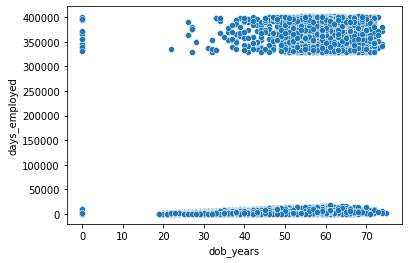

In [ ]:
df['days_employed'] = df['days_employed'].abs()

sns.scatterplot(data=df, x='dob_years', y='days_employed')

In [ ]:
years =  df.loc[:, ['days_employed', 'dob_years']]

years['years_employed'] = (years['days_employed'] / 365)
years['ratio'] = years['years_employed'] / years['dob_years']

anom = 3511 # количество аномалий
propusk = 2174 # количство NaN
gen_str = 21524 # общее количество строк 

for i in years['ratio']:
  if i >= 1:
    anom += 1
print('Доля битых значений в столбце years_employed = {0:.0%}'.format(((anom + propusk)/gen_str)), 'Это очень много.')

Доля битых значений в столбце years_employed = 26% Это очень много.


Есть гипотеза:

Что то случилось с точкой в столбце и ее нужно переместить на два знака влево. 

Звучит бредово, но лучшее идеи у меня нет

гипотеза с переводом часы или минуты не рабочая

In [ ]:
# years['ratio'].loc[:3] = years['ratio'].loc[:3].astype('str') # для проверки try - except

total_errors = 0

for i in years['ratio']:
  try:
    if i >= 1:
      total_errors += 1
      years['ratio'] = years['ratio'].replace(i,i / 100)
      
  except:
    print('Ты хочешь невозможного! Проверь тип данных')

print('Строк с ошибками:', total_errors)

Строк с ошибками: 0


In [ ]:
years['years_employed'] = years['dob_years'] * years['ratio']

df['days_employed'] = years['years_employed'] * 365

Тепрь заменим NaN в days_employed

In [ ]:
df['days_employed'] = df['days_employed'].fillna(
    df.groupby(['dob_years'])
    ['days_employed'].transform('median')
    )

propuski = df.isna().sum()

propuski = 101 

print('Доля битых значений в столбце years_employed = {0:.0%}'.format((propuski / gen_str)))
display(df.head())
print(df.isna().sum())

Доля битых значений в столбце years_employed = 0%


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,3402.660720,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


children              0
days_employed       101
dob_years             0
education             0
education_id          0
family_status         0
family_status_id      0
gender                0
income_type           0
debt                  0
total_income          0
purpose               0
dtype: int64


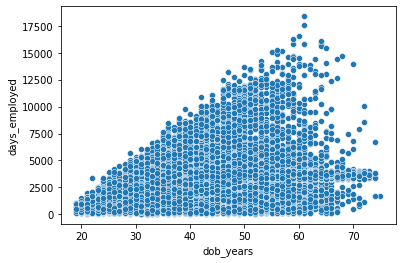

In [ ]:
sns.scatterplot(data=df, x='dob_years', y='days_employed')

Думаю, что ошибка в столбце days_employed имеет ошибки которые совершены не  из-за человеческого фактора, а и из-за технической ошибки, **а в дальнейшем исследовании этот столбец не учавствует**, я принял решение не просто сразу заменить все пропуски на медианные начения

При замене на медиану я группирую столбцы с возрастом.

Так как в столбце dob_years присутствуют значения = 0, то часть данных при медиане заменилась на 0 в столбце days_employed.

Это не соответствует условию задачи, но так будет правильнее. 

Я продолжу работу с df с 0ми значениями, так как их доля стркмится к 0%

Если потребуется полностью убрать все пропуски, то можно использовать вот этот код:

In [ ]:
# df['days_employed'] = df['days_employed'].fillna(
#     df.groupby(['income_type']) # заменил столбец группировки
#     ['days_employed'].transform('median')
#     )

## 3. Замените вещественный тип данных в столбце total_income на целочисленный, например, с помощью метода astype().

In [ ]:
df['total_income'] = df['total_income'].astype('int')

## 4. Если в данных присутствуют строки-дубликаты, удалите их.

###Также обработайте неявные дубликаты. Например, в столбце education есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв.

###Приведите их к одному регистру. Проверьте остальные столбцы.

Все дубликаты в df:

In [ ]:
df.duplicated().sum()

54

Удаление явных дубликатов с перезаписью значений индекса строк (что бы отсутствовали пропуски 1, 2, 3, 5, и тд)


In [ ]:
df = df.drop_duplicates().reset_index(drop=True)

Неявные дубли

In [ ]:
df['education'].unique()

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

In [ ]:
df['education'] = df['education'].str.lower()
df['education'].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

Можно еще так (для каждой группы), но лень:

In [ ]:
# df['education'] = df['education'].replace(['ВЫСШЕЕ', 'Высшее'], 'высшее')

In [ ]:
df['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

пока ничего не буду тут делать.


строительство недвижимости и операции с коммерческой недвижимостью - разные категории

Еще раз удалю явные дубликаты:

In [ ]:
print(df.duplicated().sum())

df = df.drop_duplicates().reset_index(drop=True)

print(df.duplicated().sum())

17
0


### После удаления дубликатов сделайте следующее:


-  поясните, как выбирали метод для поиска и удаления дубликатов в данных:

после того, как я увидел дубликаты в столбце education, я решил для начала привести все строки к одному регистру.
после повторной проверки оказалось, что дубликаты пропали.

Проверив остальные столбцы в которых могут встретиться подобные дубликаты я нашел их только в столбце purpose, но не стал их кластеризовать, так как меня об этом не просили. Но я могу.

- приведите возможные причины появления дубликатов:

считаю, что причина - человеческий фактор

## 5. Создайте два новых датафрейма, в которых:

* каждому уникальному значению из education соответствует уникальное значение education_id — в первом;

* каждому уникальному значению из family_status соответствует уникальное значение family_status_id — во втором.

In [ ]:
education = df[['education_id', 'education']]
family_status = df[['family_status_id', 'family_status']]
print(education)
print(family_status)

       education_id education
0                 0    высшее
1                 1   среднее
2                 1   среднее
3                 1   среднее
4                 1   среднее
...             ...       ...
21449             1   среднее
21450             1   среднее
21451             1   среднее
21452             1   среднее
21453             1   среднее

[21454 rows x 2 columns]
       family_status_id     family_status
0                     0   женат / замужем
1                     0   женат / замужем
2                     0   женат / замужем
3                     0   женат / замужем
4                     1  гражданский брак
...                 ...               ...
21449                 1  гражданский брак
21450                 0   женат / замужем
21451                 1  гражданский брак
21452                 0   женат / замужем
21453                 0   женат / замужем

[21454 rows x 2 columns]


### Удалите из исходного датафрейма столбцы education и family_status, оставив только их идентификаторы: education_id и family_status_id. Новые датафреймы — это те самые «словари» (не путайте с одноимённой структурой данных в Python), к которым вы сможете обращаться по идентификатору.

In [ ]:
df = df.drop(columns='education')
df = df.drop(columns='family_status')
df

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,покупка жилья
1,1,4024.803754,36,1,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623.422610,33,1,0,M,сотрудник,0,145885,покупка жилья
3,3,4124.747207,32,1,0,M,сотрудник,0,267628,дополнительное образование
4,0,3402.660720,53,1,1,F,пенсионер,0,158616,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...
21449,1,4529.316663,43,1,1,F,компаньон,0,224791,операции с жильем
21450,0,3439.374041,67,1,0,F,пенсионер,0,155999,сделка с автомобилем
21451,1,2113.346888,38,1,1,M,сотрудник,1,89672,недвижимость
21452,3,3112.481705,38,1,0,M,сотрудник,1,244093,на покупку своего автомобиля


## 6. На основании диапазонов, указанных ниже, создайте столбец total_income_category с категориями:

* 0–30000 — 'E';
* 30001–50000 — 'D';
* 50001–200000 — 'C';
* 200001–1000000 — 'B';
* 1000001 и выше — 'A'.

In [ ]:
def total_income_category(row):
  income = row['total_income']

  if income <= 30000:
    return 'E'

  if 30001 <= income <= 50000:
    return 'D'

  if 50001 <= income <= 200000:
    return 'C'

  if 200001 <= income <= 1000000:
    return 'B'

  if 1000001 <= income:
    return 'A'

  return 'категория дохода не определена'

# Проверка функции

In [ ]:
row_values = [99999]
row_columns = ['total_income']

row = pd.Series(data=row_values, index=row_columns)  

total_income_category(row)

'C'

## 7. Создайте функцию, которая на основании данных из столбца purpose сформирует новый столбец purpose_category, в который войдут следующие категории:
* 'операции с автомобилем',
* 'операции с недвижимостью',
* 'проведение свадьбы',
* 'получение образования'.

In [ ]:
def purpose_category(row):
  
  purpose = row['purpose']

  if 'авто' in purpose:
    return 'операции с автомобилем'

  if 'жил' in purpose or 'недвиж' in purpose:
    return 'операции с недвижимостью'
    
  if 'образов' in purpose:
    return 'получение образования'
  
  if 'свад' in purpose:
    return 'проведение свадьбы'
  
  return 'цель не определена'

проверка функции

In [ ]:
row_values = ['жилище']
row_columns = ['purpose']

row = pd.Series(data=row_values, index=row_columns)  

purpose_category(row)

'операции с недвижимостью'

добавляем столбцы с результатами работы функции в df

In [ ]:
df['total_income_category'] = df.apply(total_income_category, axis=1)
df['purpose_category'] = df.apply(purpose_category, axis=1)
df.head(3)

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,1,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью


# Шаг 3. Ответьте на вопросы:



У нас нет в документации нет сведений что из значений считать за возврат кредита, поэтому я буду руководствоваться принципом:

 - 0 = False - задолжености нет
 - 1 = True - задолженность есть

### Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [ ]:
# уберу отрицательное значение

df['children'] = df['children'].abs()

AxesSubplot(0.125,0.125;0.775x0.755)


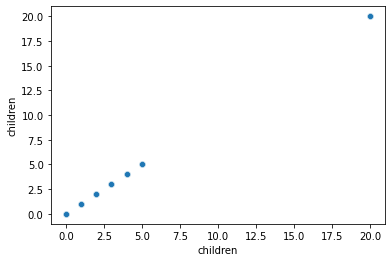

In [ ]:
# 20 детей - скорее всего опечатка. исправлю на 2 (если бы это была не опечатка, мы бы видели планый рост от 0 детей до 20)

print(sns.scatterplot(data=df, x='children', y='children'))

df['children'] = df['children'].replace(20,2)

AxesSubplot(0.125,0.125;0.775x0.755)


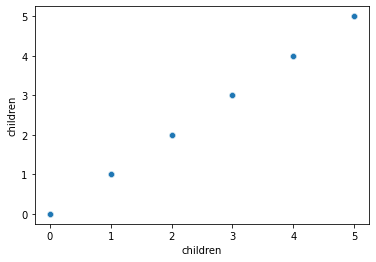

In [ ]:
# так лучше

print(sns.scatterplot(data=df, x='children', y='children'))

In [ ]:
# создадм сводную таблицу

chidren_pivot = df.pivot_table(
    index=['children'],
    columns='debt',
    values='family_status_id',
    aggfunc='count'
    )

в столбце debt есть NaN или это говорит о том, что у семей с 5ю детьми нет задолженностей

добавлю столбец ratio. Он показывает процент должников.

In [ ]:
chidren_pivot[1] = chidren_pivot[1].fillna(0) # почикаю NaNы для красоты

sum_debt = chidren_pivot[1] + chidren_pivot[0]

chidren_pivot['responsibl'] = ((chidren_pivot[0]/sum_debt) * 100).round(1).astype(str) + '%'
chidren_pivot['debtor'] = ((chidren_pivot[1]/sum_debt) * 100).round(1).astype(str) + '%'


display(chidren_pivot)

debt,0,1,responsibl,debtor
children,,,,
0,13028.0,1063.0,92.5%,7.5%
1,4410.0,445.0,90.8%,9.2%
2,1926.0,202.0,90.5%,9.5%
3,303.0,27.0,91.8%,8.2%
4,37.0,4.0,90.2%,9.8%
5,9.0,0.0,100.0%,0.0%


Можно еще так, но не нравится. 

In [ ]:
df_children = pd.pivot_table(df, index='children', values='debt', aggfunc=('count', 'mean'))
df_children['mean'] = (df_children['mean']*100).round(1).astype(str) + '%'
df_children

,count,mean
children,,
0,14091.0,7.5%
1,4855.0,9.2%
2,2128.0,9.5%
3,330.0,8.2%
4,41.0,9.8%
5,9.0,0.0%


###### Вижу, что у бездетных меньше задолженностей по кредитам.

Однако с появлением одного или двух детей у человека возрастает вероятность того, что задолженность появится.

Это будет происходить пока у заемщика не появится третий ребенок. Должников среди этой категории меньше чем среди тех кто имеет 1го или 2ух детей.

Самый высокий риск появления задолженности у людей которые имеют 4 ребенка.

Если у клиента банка 5 детей, то риск возникновения задолженности сводится к 0. 

(для более точной оценки риска необходимо больше данных людьми которые имеют от 3х до 5ти детей включительно)



### Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [ ]:
family_pivot = family_status.pivot_table(
    index='family_status',
    columns=df['debt'],
    values='family_status_id',
    aggfunc='count'
    )

sum_debt = family_pivot[1] + family_pivot[0]

family_pivot['responsibl'] = ((family_pivot[0]/sum_debt) * 100).round(1).astype(str) + '%'
family_pivot['debtor'] = ((family_pivot[1]/sum_debt) * 100).round(1).astype(str) + '%'

display(family_pivot)

debt,0,1,responsibl,debtor
family_status,,,,
Не женат / не замужем,2536,274,90.2%,9.8%
в разводе,1110,85,92.9%,7.1%
вдовец / вдова,896,63,93.4%,6.6%
гражданский брак,3763,388,90.7%,9.3%
женат / замужем,11408,931,92.5%,7.5%


Сразу вопрос: что мы считаем гражданским браком и что женат/замужем? вот [ссыль](https://ru.wikipedia.org/wiki/Гражданский_брак)

Вдовцы и люди в разводе имеют наименьший показатель задолженностей

Люди состоящие в гражданском браке (для просты буду считать, что это просто сожительство без регистрации в загсе или церкви) имеют один из самых высоких показательй задолженностей. 

Круче гражданских браков только холостые. 9,8% из общего числа заемщиков этой категории доставят хлопоты банку.

Женатые люди - крепкая середина из данной выборки. Имеют задолженность 7,5% семей

Чемпионы - люди в разводе. Самый маленький процент долгов - 7,1%. 

Если вы спросите меня кому дать кредит так, что бы вернул, то я посоветую дать вдовцу. 

### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [ ]:
income_pivot = df.pivot_table(
    index='total_income_category',
    columns='debt',
    values='family_status_id',
    aggfunc='count'
    )

sum_debt = income_pivot[1] + income_pivot[0]

income_pivot['responsibl'] = ((income_pivot[0]/sum_debt) * 100).round(1).astype(str) + '%'
income_pivot['debtor'] = ((income_pivot[1]/sum_debt) * 100).round(1).astype(str) + '%'

display(income_pivot)

debt,0,1,responsibl,debtor
total_income_category,,,,
A,23,2,92.0%,8.0%
B,4686,356,92.9%,7.1%
C,14655,1360,91.5%,8.5%
D,329,21,94.0%,6.0%
E,20,2,90.9%,9.1%


* D (доход от 30001 до 50000 денег в месяц) - у этой категрии самый низкий процент задолженностей.

* B (доход от 200001 до 1000000 денег в месяц) - если дать кредит 100 человекам из этой группы, то 7 человек скорее всего будут иметь просроченные платежи.

* A (доход от 1000001 денег в месяц) - рисковые, но по количеству задолженностей занимают серединку

* С (доход от 50001 до 200000 денег в месяц) - люди из этой категории имеют достаточно высокий риск появления задолженностей перед банком

* E (доход до 30000 денег в месяц) - люди с низким доходом чаще других не возвращают долг в срок.

Прямой корреляции появления задолженности от уровня дохода аналитик Миша не выявил.


### Как разные цели кредита влияют на его возврат в срок?


In [ ]:
purpose_pivot = df.pivot_table(
    index='purpose_category',
    columns='debt',
    values='family_status_id',
    aggfunc='count'
    )

sum_debt = purpose_pivot[1] + purpose_pivot[0]

purpose_pivot['responsibl'] = ((purpose_pivot[0]/sum_debt) * 100).round(1).astype(str) + '%'
purpose_pivot['debtor'] = ((purpose_pivot[1]/sum_debt) * 100).round(1).astype(str) + '%'

display(purpose_pivot)

debt,0,1,responsibl,debtor
purpose_category,,,,
операции с автомобилем,3903,403,90.6%,9.4%
операции с недвижимостью,10029,782,92.8%,7.2%
получение образования,3643,370,90.8%,9.2%
проведение свадьбы,2138,186,92.0%,8.0%


Разные цели по разному влияют на возврат кредита в срок. 
Думаю, что для категории людей цель которых операции с автомобилем нужно закладывать риск просорочек больше чем для любых других категорий, так как по статистике 9,4% таких заемщиков не возвращают кредит в срок. 

Меньше всего проблем с возвратом кредита в установленные договором сроки имеют люди которые совершают операции с недвижимостью. 

# Шаг 4. Напишите общий вывод


##### Портрет клиента с наибольшей вероятностью просрочки по кредиту: имеет 4 ребенка, не состоит в браке, имеет доход до 30 000 рублей в месяц и хочет купить автомобиль.

1) Это было эпично и легендарно

2) у меня не получается сортировать( например:

purpose_pivot = purpose_pivot.sort_values(by='ratio', ascending=True)

3) Возможно я перемудрил со сдвигом точки в столбце со стажем, но мне кажется, что график распределения у меня получился красивый

4) Преподаватель по проектам подсказала очень крутой способ считать медиану (в данном случае) с помощью метода trasform. Нравится

5) Спасибо за проверку моей работы)

6) Если потребуется, я напишу выводы в официальном стиле.